In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
data = pd.read_csv("tripadvisor_hotel_reviews.csv")

In [3]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
print(data.shape)
print(data.columns)

(20491, 2)
Index(['Review', 'Rating'], dtype='object')


In [6]:
# rating을 살펴보기
Classes = data["Rating"]

In [7]:
Classes, type(Classes)

(0        4
 1        2
 2        3
 3        5
 4        5
         ..
 20486    5
 20487    4
 20488    2
 20489    1
 20490    2
 Name: Rating, Length: 20491, dtype: int64,
 pandas.core.series.Series)

In [8]:
Classes.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

Text(0.5, 0, 'Rating')

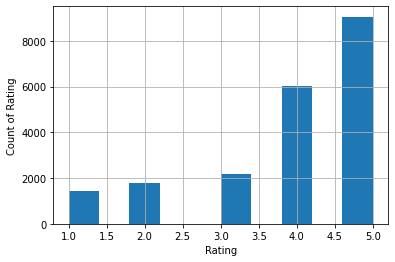

In [9]:
Classes.hist()
plt.ylabel("Count of Rating")
plt.xlabel("Rating")

In [11]:
reviews =data["Review"]
reviews[:10]

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not 4* experience hotel monaco seat...
3    unique, great stay, wonderful time hotel monac...
4    great stay great stay, went seahawk game aweso...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city, husband spent 7 nights m...
7    excellent staff, housekeeping quality hotel ch...
8    hotel stayed hotel monaco cruise, rooms genero...
9    excellent stayed hotel monaco past w/e delight...
Name: Review, dtype: object

In [12]:
reviews = reviews.str.replace(r"[^A-Za-z]"," ")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_16360/961741904.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace(r"[^A-Za-z]"," ")


In [13]:
print(reviews[:10])

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not    experience hotel monaco seat...
3    unique  great stay  wonderful time hotel monac...
4    great stay great stay  went seahawk game aweso...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city  husband spent   nights m...
7    excellent staff  housekeeping quality hotel ch...
8    hotel stayed hotel monaco cruise  rooms genero...
9    excellent stayed hotel monaco past w e delight...
Name: Review, dtype: object


In [15]:
reviews = reviews.str.lower()
print(reviews[:10])

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms not    experience hotel monaco seat...
3    unique  great stay  wonderful time hotel monac...
4    great stay great stay  went seahawk game aweso...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city  husband spent   nights m...
7    excellent staff  housekeeping quality hotel ch...
8    hotel stayed hotel monaco cruise  rooms genero...
9    excellent stayed hotel monaco past w e delight...
Name: Review, dtype: object


In [16]:
#불용어 처리
from nltk.corpus import stopwords

In [17]:
stop_words = set(stopwords.words("english"))
type(stop_words), print(stop_words)

{'to', 'been', 're', 'did', 'when', 'i', "shouldn't", 'the', 'who', 'herself', 'from', 'then', 'she', 'himself', 'what', 'for', 'their', 'won', 'just', 'if', 'as', 'so', 't', 'can', 'does', 'all', 'should', 'both', "wouldn't", 'or', "haven't", 'off', 'do', 'o', 'ours', 'about', "shan't", 'having', 'doesn', 'wasn', 'but', 'after', 'shan', 'them', 'will', 'have', 'hasn', 'a', 'than', 'and', 'myself', 'above', 'of', 'that', 'most', 'is', 'at', 'each', 'out', 'such', 'below', "you're", 'there', "she's", "wasn't", 'we', 'our', "you'd", 'whom', 'here', 'any', "don't", 'you', "mightn't", "you'll", 'an', 'again', 'its', 'during', 'by', 'has', "doesn't", 'shouldn', "needn't", 'he', 'very', "isn't", 'down', 'had', 'doing', 'ma', 'mightn', 'his', 'wouldn', 'through', 'am', "won't", 'y', "should've", "hasn't", "hadn't", 'why', 'be', 'against', 'other', 'nor', 'while', "didn't", 'him', 'only', 'were', "weren't", 'this', 'her', 'more', 'weren', 'don', 'in', 'on', 'aren', 'with', 'which', 'needn', 's

(set, None)

In [19]:
# 람다 식을 이용한 불용어 처리
# 띄어쓰기를 기준으로 단어를 나눴으니 " ".join으로 처리한다
reviews = reviews.apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words)
)
print(reviews[:10])

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice rooms experience hotel monaco seattle goo...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
5    love monaco staff husband stayed hotel crazy w...
6    cozy stay rainy city husband spent nights mona...
7    excellent staff housekeeping quality hotel cho...
8    hotel stayed hotel monaco cruise rooms generou...
9    excellent stayed hotel monaco past w e delight...
Name: Review, dtype: object


In [20]:
# 단어의 원래 뜻 찾기 stemming(어근)
ps = nltk.PorterStemmer()
reviews = reviews.apply(
    lambda x: " ".join(ps.stem(word) for word in x.split())
)

In [21]:
print(reviews[:10])

0    nice hotel expens park got good deal stay hote...
1    ok noth special charg diamond member hilton de...
2    nice room experi hotel monaco seattl good hote...
3    uniqu great stay wonder time hotel monaco loca...
4    great stay great stay went seahawk game awesom...
5    love monaco staff husband stay hotel crazi wee...
6    cozi stay raini citi husband spent night monac...
7    excel staff housekeep qualiti hotel chock staf...
8    hotel stay hotel monaco cruis room gener decor...
9    excel stay hotel monaco past w e delight recep...
Name: Review, dtype: object


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [23]:
X = vectorizer.fit_transform(reviews)

In [24]:
type(X),X.shape

(scipy.sparse.csr.csr_matrix, (20491, 35692))

In [25]:
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaar', 'aaah', 'aaahhh', 'aadvantag', 'aah', 'aahh', 'aalder', 'aand', 'aani', 'aaron', 'aarp', 'aarrgh', 'aavac', 'ab', 'abac', 'aback', 'abait', 'abalon', 'abandon', 'abat', 'abba', 'abbay', 'abbeloui', 'abber', 'abbey', 'abbi', 'abbot', 'abbott', 'abbrevi', 'abc', 'abd', 'abderahim', 'abdic', 'abdomen', 'abdomin', 'abdulaziz', 'abe', 'abeauti', 'abel', 'aber', 'abercrombi', 'aberdeen', 'abessess', 'abett', 'abi', 'abian', 'abid', 'abigail', 'abil', 'abit', 'abl', 'ablast', 'ableto', 'abnorm', 'aboard', 'abod', 'aboit', 'abolish', 'abolut', 'abomin', 'abondon', 'abono', 'aboot', 'aboout', 'aboput', 'aborigin', 'abort', 'aboslut', 'abosolut', 'abosolutey', 'abosult', 'abot', 'abottl', 'abou', 'abound', 'abouot', 'abour', 'abouta', 'aboutth', 'abraham', 'abrahan', 'abras', 'abreast', 'abroad', 'abrupt', 'abruptli', 'abruzzo', 'absaloutli', 'absenc', 'absens', 'absent', 'absente', 'absentmindedli', 'abso', 'absolout', 'abs

d:\Git\study\nltk\nltk\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(X.toarray()), print(X.toarray().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(20491, 35692)


(None, None)

In [29]:
y= data["Rating"]
print(y)

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
# KNeighborsClassifier 사용 했을 경우
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [43]:
classifier.fit(Train_X,Train_Y)

KNeighborsClassifier()

In [44]:
prediction =  classifier.predict(Test_X)

In [45]:
from sklearn.metrics import accuracy_score
print("KNeighbors Accuracy Score is ", accuracy_score(prediction, Test_Y) * 100)

KNeighbors Accuracy Score is  48.604333398399376


In [46]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(Test_Y, prediction),
    index = [ ["actual","actual","actual","actual","actual"],["1","2","3","4","5"] ],
    columns = [ ["predicted","predicted","predicted","predicted","predicted"],["1","2","3","4","5"] ]
)

predicted                    
                 1   2    3    4     5
actual 1       135  64   31   78    56
       2        77  50   69  133   102
       3        33  47   87  214   160
       4        25  36  119  657   729
       5        15  24   60  561  1561

In [52]:
# LinearSVC 사용 했을 경우
from sklearn.svm import LinearSVC
classifier = LinearSVC()

In [53]:
classifier.fit(Train_X,Train_Y)

LinearSVC()

In [54]:
prediction =  classifier.predict(Test_X)

In [55]:
from sklearn.metrics import accuracy_score
print("LinearSVC Accuracy Score is ", accuracy_score(prediction, Test_Y) * 100)

KNeighbors Accuracy Score is  59.2426312707398


In [56]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(Test_Y, prediction),
    index = [ ["actual","actual","actual","actual","actual"],["1","2","3","4","5"] ],
    columns = [ ["predicted","predicted","predicted","predicted","predicted"],["1","2","3","4","5"] ]
)

predicted                     
                 1    2    3    4     5
actual 1       221   83   20   18    22
       2        67  140  100   83    41
       3        16   89  136  222    78
       4         7   33  110  716   700
       5         3    8   24  364  1822

똑같은 데이터도 모델에 따라서 결과가 달라짐을 알 수 있음


In [70]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    # 어떤 단어가 최소 20개 이상은 존재 해야한다
    min_df = 20, #documents frequency
    # 단어를 두개씩 묶어서 본다.
    ngram_range = (1,2),
    #sublinear_tf 파라미터는 TF (Term-Frequency, 단어빈도) 값의 스무딩(smoothing) 여부를 결정하는 파라미터 입니다. (True/False)
    sublinear_tf = True 
)

In [71]:
X = vectorizer.fit_transform(reviews)

In [72]:
# 단어가 3만개에서 만오천개로 줄어들었다. 
type(X),X.shape

(scipy.sparse.csr.csr_matrix, (20491, 14978))

In [73]:
print(X.toarray()), print(X.toarray().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(20491, 14978)


(None, None)

In [74]:
y= data["Rating"]
print(y)

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64


In [75]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,y,test_size=0.25,random_state=42)

In [76]:
# LinearSVC 사용 했을 경우
from sklearn.svm import LinearSVC
classifier = LinearSVC()

In [77]:
classifier.fit(Train_X,Train_Y)

LinearSVC()

In [78]:
prediction =  classifier.predict(Test_X)

In [81]:
from sklearn.metrics import accuracy_score
print("LinearSVC Accuracy Score is ", accuracy_score(prediction, Test_Y) * 100)

LinearSVC Accuracy Score is  59.57446808510638


In [82]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(Test_Y, prediction),
    index = [ ["actual","actual","actual","actual","actual"],["1","2","3","4","5"] ],
    columns = [ ["predicted","predicted","predicted","predicted","predicted"],["1","2","3","4","5"] ]
)

predicted                     
                 1    2    3    4     5
actual 1       228   87   17   17    15
       2        75  139   98   80    39
       3        20   90  153  205    73
       4         7   34  108  733   684
       5         3    9   15  395  1799

In [84]:
# 아주 강력하게 여러 모델들을 실행 해 볼수 있는 라이브러리
!pip install pycaret

Traceback (most recent call last):
  File "C:\Program Files\Python38\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\Python38\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\Git\study\nltk\nltk\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


In [83]:
from pycaret.classification import *
import pandas as pd

review_data = pd.read_csv("tripadvisor_hotel_reviews.csv")
exp_name = setup(data = review_data,target = "Rating")
Ir =create_model("Ir")
tuned_Ir = tune_model(Ir)

ModuleNotFoundError: No module named 'pycaret'